<a href="https://colab.research.google.com/github/shinmiura/diveintocode-ml/blob/master/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sprintの目的**

・スクラッチを通してK-meansを理解する

・クラスタ分析を行う

**どのように学ぶか**

スクラッチでK-meansを実装した後、それを使用しクラスタ分析を行います。

# 2.K-meansスクラッチ

K-meansのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchKMeansクラスにコードを書き加えていってください。

実装の手順(授業スライドP12の内容を転載)

①サンプル数のインデックスに対し、kクラス分のランダムな初期ラベルを割り当てる

②各ラベル毎にデータ点をグルーピングし、クラスタを作成する

③クラスタ毎にデータ点の平均値を求め、そのクラスタの重心とする

④その重心から、全てのサンプルのデータ点との距離を計算する

⑤各データ点から見て、距離が最小となる重心のクラスタにそのデータ点を割り当てる

⑥上記③〜⑤を繰り返す

⑦収束条件(値が変化しない・定義した反復回数に達した等)を満たしたら、終了

⑧初期値を更新し、①〜⑦をn回繰り返し、SSEが最小のものを選ぶ

In [1]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters = 2, n_init = 20, n_iter = 100, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.verbose = verbose
        # 初期値(あり得ないくらい大きい値をいったん置く)
        self.best_sse = 20 ** 20
    
    # 問題4（中心点の移動）の解答をここに記載
    def _update_myu(self, X):
      """
      出発点(2回目以降は重心)を更新するメソッド
      Parameters
      ----------
      X : 次の形のndarray, shape (n_samples, n_features)
          特徴量
      """
      self.pre_myu = self.myu
      # クラスタ数分だけ処理が必要なためクラスタ数でfor文を回す
      for j in range(self.n_clusters):
        # ちょうどループ中のクラスタの特徴量だけの平均を出す→これが次の出発点
        self.myu[j] = np.mean(X[X[:, -1] == j, : -1], axis = 0)
    
    # 問題3（クラスタへの割り当て）の解答をここに記載
    def _update_cluster(self, X):
      """
      クラスタを更新するメソッド
      Parameters
      ----------
      X : 次の形のndarray, shape (n_samples, n_features)
          特徴量
      """
      # 各データ点について重心との距離を測って一番近い重心のクラスタに割り当てるためデータ数でfor文を回す
      for i in range(len(X)):
        # 距離が小さい場合に置き換えるため従来と最新で比較する必要あり。そのための初期値をここで用意
        dist_m = 20 ** 20
        # クラスタ数分だけ処理が必要なためクラスタ数でfor文を回す
        for j in range(self.n_clusters):
          # 該当クラスタの中心点との距離を計算
          dist = np.sqrt(np.sum((X[i, :-1]-self.myu[j])**2))
          # 前回保存した(あるいは初期値)より距離が小さければ、そちらのクラスタを採用
          if dist < dist_m:
            dist_m = dist
            X[i, -1] = j

    # 問題2（SSEを求める関数の作成）の解答をここに記載
    def calc_sse(self, X):
      """
      SSEを計算するメソッド
      Parameters
      ----------
      X : 次の形のndarray, shape (n_samples, n_features)
          特徴量
      """
      # SSEの初期値を設定
      sse = 0
      # 各データ点について重心との距離を測って一番近い重心のクラスタに割り当てるためデータ数でfor文を回す
      for i in range(len(X)):
        # クラスタ数分だけ処理が必要なためクラスタ数でfor文を回す
        for j in range(self.n_clusters):
          # Xの末尾の列のクラスタを判定→該当クラスタであればSSEへ
          if j == X[i, -1]:
            # SSEの数式をコード化
            sse += np.sum((X[i, :-1] - self.myu[j]) ** 2)
      # sseが改善していれば更新し、していなければ終了
      if self.best_sse > sse:
        self.best_sse = sse
        self.record_myu = self.myu
        self.record_cluster = self.n_clusters

    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        # 問題5（繰り返し）の解答をここに記載
        # 初期値を更新する回数だけfor文を回す
        for i in range(self.n_init):
          # Xにクラスターラベルを付与(ひとまず0で初期化しておいたが自信がありません！！)
          # クラスターラベルの列を作成しひとまず0で初期化
          cluster = np.zeros(len(X)).reshape(-1, 1)
          # クラスターラベルの列をXに付与する
          X_labeled = np.concatenate([X, cluster] , axis = 1)
          # 問題1（中心点の初期値を決める）の解答をここに記載
          # 入力されたデータ(X)からK個(クラスター数の分だけ)の初期値をランダムに設定
          self.myu = X[np.random.choice(len(X), size = self.n_clusters, replace = False)]
          
          # Xベクトルにクラスタ数分の初期値をランダムにとってくる(各クラスタの初期の中心点)
          cluster = np.zeros(len(X))
          X_cluster = np.concatenate([X, cluster.reshape(-1, 1)], axis = 1)

          for j in range(self.n_iter):
            # ①各重心に対しすべてのデータ点とのユークリッド距離を計算する
            self.calc_sse(X_cluster)
            # ②各重心との距離が最小となるデータ点群を、(当該重心に帰属する)同じクラスターとして分類する
            self._update_cluster(X_cluster)
            # ③K個のクラスターそれぞれでデータの平均となる点を求めて、その点を新たな重心として更新
            self._update_myu(X_cluster)
            # 重心の位置が変化しなくなるまで上記①〜③を繰り返す            
            
            # 学習状況の出力          
            if self.verbose:
              #verboseをTrueにした際は学習過程を出力
              print('初期化:%s 学習回数:%s 最善のSSE:%s'%(i, j, self.best_sse))

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        Parameters
        ----------
        X : 説明変数
        """
        # 予測値の初期化
        y_pred = np.zeros(len(X))
        # 処理の流れ自体は、_reclustering関数と同様
        # データ数でループ
        for i in range(len(X)):
          #　比較のための初期値
          dist_m = 10 ** 20
          # クラスタ数でループ
          for j in range(self.record_cluster):
            # 前回保存した(あるいは初期値)より距離が小さければ、そちらのクラスタを採用
            dist = np.sqrt(np.sum((X[i] - self.record_myu[j]) ** 2))
            if dist < dist_m:
              dist_m = dist
              y_pred[i] = j

        return y_pred


**クラスタリングのための人工データセット**

クラスタリングを実験するための人工データセットを作成するコードを用意しています。


このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。


《シンプルデータセット3》



In [2]:
# ライブラリのインポート
import numpy as np
from numpy.random import *
import random
# k-means法を使うためのインポート
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
# シンプルデータセット3取得のためのインポート
from sklearn.datasets import make_blobs
# 注意事項 : make_blodsは２つの値を返すため、片方は使用しない「_」で受け取るようにする！
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [4]:
X.shape

(100, 2)

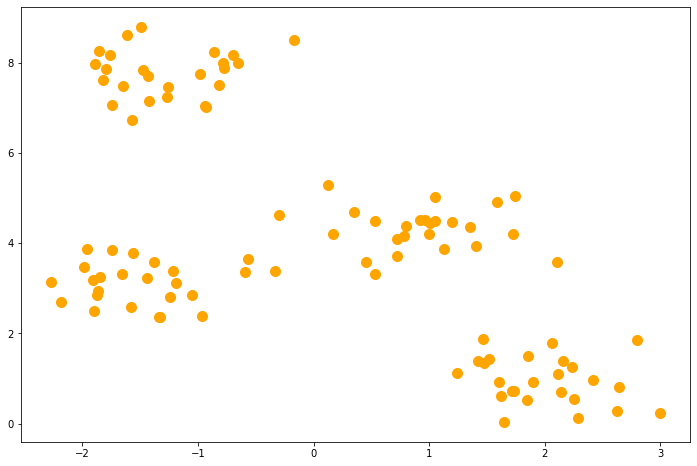

In [5]:
# データの可視化
fig = plt.subplots(figsize = (12, 8))
plt.rcParams['font.size'] = 20
plt.scatter(X[:, 0], X[:, 1], s = 100, color = 'orange')

In [6]:
# データの分割
from sklearn.model_selection import train_test_split
X_train, X_valid = train_test_split(X, test_size = 0.3, random_state = None)

print(X_train.shape)
print(X_valid.shape)

(70, 2)
(30, 2)


**学習**

K-meansの学習に必要な要素を順番に作成していきます。

【問題1】中心点の初期値を決める

入力されたデータから$K$個の中心点$\mu_1$から$\mu_k$の初期値を決めるコードを作成してください。$K$は指定したクラスタ数です。

最もシンプルな初期値の決定方法は、データ点$X_n$の中からランダムに$K$個選ぶことです。今回はこれを実装してください。

K-meansの学習結果は中心点μの初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

In [7]:
n_clusters = 3

In [8]:
myu = X[np.random.choice(len(X), size = n_clusters, replace = False)]
myu

array([[-0.92819001,  7.02698199],
       [-1.21986433,  3.3789856 ],
       [ 1.51989121,  1.42488952]])

In [9]:
cluster = np.zeros(len(X)).reshape(-1, 1)
X_labeled = np.concatenate([X, cluster], axis = 1)

In [10]:
X_labeled

array([[ 0.72086751,  3.71347124,  0.        ],
       [-1.89468423,  7.96898545,  0.        ],
       [ 1.35678894,  4.36462484,  0.        ],
       [ 1.05374379,  4.49286859,  0.        ],
       [ 1.59141542,  4.90497725,  0.        ],
       [ 0.78260667,  4.15263595,  0.        ],
       [-1.95751686,  3.87291474,  0.        ],
       [-0.77354537,  7.87923564,  0.        ],
       [ 0.12313498,  5.27917503,  0.        ],
       [-1.43284669,  7.71577043,  0.        ],
       [-0.92819001,  7.02698199,  0.        ],
       [-1.74836345,  7.06307447,  0.        ],
       [-1.26789718,  7.25141327,  0.        ],
       [-0.98661744,  7.74968685,  0.        ],
       [-0.81984047,  7.50994722,  0.        ],
       [ 2.99684287,  0.22378413,  0.        ],
       [ 1.46870582,  1.86947425,  0.        ],
       [-0.33533163,  3.390122  ,  0.        ],
       [-1.86407034,  2.93379754,  0.        ],
       [ 2.62496786,  0.28025075,  0.        ],
       [ 2.11114739,  3.57660449,  0.   

【問題2】SSEを求める関数の作成

クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。


K-meansはこのSSEを最小化する 
$r_n$$_k$と$\mu_k$を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

$$
SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2
$$

$n$ : データ点のインデックス


$k$ : クラスタのインデックス


$X_n$ : n番目のデータ点


$\mu_k$ : k番目の中心点


$r_n$$_k$ : データ点$X_n$がクラスタkに所属していたら1、そうでなければ0

**クラスタの割り当てと中心点の移動を繰り返す**

K-meansの学習の基本は以下の2つのフェーズを繰り返すことです。

中心点$\mu_k$を固定した上で$SSE$を最小化するクラスタの割り当て$r_n$$_k$を選ぶ。
クラスタの割り当て$r_n$$_k$を固定した上で$SSE$を最小化する中心点$\mu_k$を選ぶ。

最初の中心点$\mu_k$は問題1で作成した初期値です。
順番に見ていきます。

In [11]:
for j in range(3):
  a = np.mean(X[X[:, -1] == j, : -1], axis = 0)

a

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


array([nan])

In [12]:
def calc_sse(self, X)

SyntaxError: ignored

【問題3】クラスタへの割り当て

すべてのデータ点$X_n$を最も近い中心点$μ_k$に割り当てるコードを作成してください。

K-menasにおける**近い**とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル$p$,$q$に対しては以下の数式で表現できます。

$$
\|q-p\| = \sqrt{(q-p)\cdot(q-p)}
$$

NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。


numpy.linalg.norm — NumPy v1.17 Manual


中心点$\mu_k$を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。



In [ ]:
def _update_claster(self, X)

【問題4】中心点の移動

中心点$μ_k$を$k$番目のクラスタに割り当てられるすべてのデータ点$X_n$の平均値（重心）に移動するコードを作成してください。


クラスタの割り当て$r_n$$_k$を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [ ]:
def _update_cluter(self, X)

【問題5】繰り返し

クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。

・繰り返しが指定した回数に到達する。（雛形では引数max_iter）

・中心点$\mu_k$と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）

In [ ]:
for i in range(self.n_int):
  for j in range(self.n_iter):

【問題6】異なる初期値で計算

問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。

複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点$\mu_k$を保持しておきます。



In [13]:
# # 問題6（異なる初期値で計算）の解答
km = ScratchKMeans(n_clusters = 3, n_init = 5, n_iter = 100, verbose = True)
km.fit(X_train)

初期化:0 学習回数:0 最善のSSE:712.4164619050209
初期化:0 学習回数:1 最善のSSE:91.01273773737641
初期化:0 学習回数:2 最善のSSE:91.01273773737641
初期化:0 学習回数:3 最善のSSE:91.01273773737641
初期化:0 学習回数:4 最善のSSE:91.01273773737641
初期化:0 学習回数:5 最善のSSE:91.01273773737641
初期化:0 学習回数:6 最善のSSE:91.01273773737641
初期化:0 学習回数:7 最善のSSE:91.01273773737641
初期化:0 学習回数:8 最善のSSE:91.01273773737641
初期化:0 学習回数:9 最善のSSE:91.01273773737641
初期化:0 学習回数:10 最善のSSE:91.01273773737641
初期化:0 学習回数:11 最善のSSE:91.01273773737641
初期化:0 学習回数:12 最善のSSE:91.01273773737641
初期化:0 学習回数:13 最善のSSE:91.01273773737641
初期化:0 学習回数:14 最善のSSE:91.01273773737641
初期化:0 学習回数:15 最善のSSE:91.01273773737641
初期化:0 学習回数:16 最善のSSE:91.01273773737641
初期化:0 学習回数:17 最善のSSE:91.01273773737641
初期化:0 学習回数:18 最善のSSE:91.01273773737641
初期化:0 学習回数:19 最善のSSE:91.01273773737641
初期化:0 学習回数:20 最善のSSE:91.01273773737641
初期化:0 学習回数:21 最善のSSE:91.01273773737641
初期化:0 学習回数:22 最善のSSE:91.01273773737641
初期化:0 学習回数:23 最善のSSE:91.01273773737641
初期化:0 学習回数:24 最善のSSE:91.01273773737641
初期化:0 学習回数:25 最善のSSE:91.01273773737

【問題7】推定

新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。


データ点 $X_n$ と学習で決まった中心点 $\mu_k$ に対し、 $SSE$ を最小化する $r_{nk}$ を選ぶ。

具体的には次のことです。


データ点 $X_n$ を最も近い $\mu_k$ に割り当てる。

In [14]:
pred = km.predict(X_valid)
pred

array([0., 2., 2., 0., 0., 1., 0., 0., 0., 2., 0., 1., 0., 1., 0., 2., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 2., 2., 0., 2., 2.])

【問題8】エルボー法の実装

K-meansにおいて中心点の個数 $k$ は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 $k$ を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 $k$ を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

Text(0, 0.5, 'Distortion')

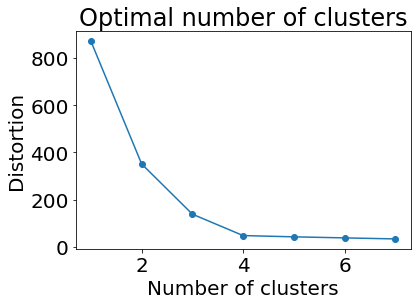

In [22]:
distortions = {}

for k in range(1, 8):
  km = ScratchKMeans(n_clusters = k, n_init = 5, n_iter = 100, verbose=False)
  km.fit(X)
  distortions[k] = km.best_sse

plt.plot(list(distortions.keys()), list(distortions.values()), marker="o")
plt.title('Optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [23]:
# データセットの読み込み
dataset = pd.read_csv("/content/drive/MyDrive/DIC/Wholesale customers data.csv")

In [24]:
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [34]:
dataset.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


【問題9】（アドバンス課題）シルエット図

$k$ を決める助けになるものとしてシルエット図もあります。シルエット図を表示するコードを作成してください。


Matplotlibを使い図を表示するコードは用意しました。以下を与えてください。


silhouette_vals : shape(n_samples,)のndarray、各データ点のシルエット係数


silhouette_avg : float、シルエット係数の平均値


y_km : shape(n_samples,)のndarray、各データ点のクラスタラベル名


cluster_labels : list、クラスタのラベル名のリスト


n_clusters : int、クラスタ数


$n$ 番目のデータ点に対するシルエット係数 $s_n$ は以下の数式でを求められます。この数式を実装し、シルエット図を確認してください。

$$
s_n = \frac{b_n-a_n}{max(b_n,a_n)}
$$


$a_n$ : 凝集度。同じクラスタ内の他のデータ点との距離の平均値。


$b_n$ : 乖離度。最も近い他のクラスタ内のすべてのデータ点との距離の平均値。


乖離度 $b$ が大きく、凝集度 $a$ が小さい時が理想的であり、シルエット係数 $s$ は1に近くなります。



《シルエット図を表示するためのコード》



In [ ]:
from matplotlib import cm
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

# 3.クラスタ分析

**卸売業者のデータ分析**

クラスタリングの利用法を学ぶために、Wholesale customers Data Setを使用します。


UCI Machine Learning Repository: Wholesale customers Data Set


Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。

**次元削減**

金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

In [26]:
# 《PCAのサンプルコード》
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(dataset)
data_pca = pca.transform(dataset)

[0.45961362 0.86478588 0.93481596 0.97883941 0.99386152 1.
 1.         1.        ]


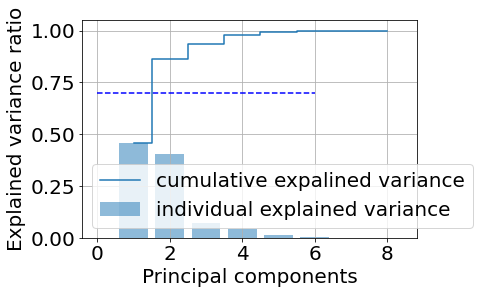

In [28]:
# 《PCAの分散説明率を表示するコードサンプル》
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(dataset)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,9), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,9), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

【問題10】クラスタ数kの選択

最適だと思われるクラスタ数 $k$ を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

〈問題10解答〉
最適なクラスタ数k = 4とした。
エルボー法で４までは大きく変動し、５以降はほぼ動かなかったこと、３〜５程度を超えてくると現実的な打ち手を実行していく上で現実的でないため４つに分けるのが妥当と判断した。

【問題11】既知のグループとの比較

RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

〈問題11解答〉
RegionやChannelは単一の要素で別れているが、クラスタはどれか１つの要素で分けられているわけではない点で異なっている。

【問題12】卸売業者にとって有益な情報

卸売業者にとって有益な情報を探し出し文章にまとめてください。

〈問題12解答〉

流通方法や、卸先の地域情報以外に、類似する傾向を掴むことができ４つのグループに大別できると分けられる。
ターゲットごとにポジショニングを決めて有効な打ち手を打ちやすくなる点で有益である。

《ヒント》


前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。


条件ごとにデータを見る際にはPandasのgroupbyが便利です。


pandas.DataFrame.groupby — pandas 0.23.4 documentation

# 4.他の非階層クラスタリング手法


【問題13】（アドバンス課題）他の手法の調査

今回扱ったK-means以外に非階層クラスタリングで有名な手法としては DBSCAN 、
PCA以外に次元削減手法で有名な手法としては t-SNE や LLE があります。


・DBSCANのメリット・デメリット

・t-SNE、LLEのメリット・デメリット

について記述してください。

【問題14】（アドバンス課題）t-SNEとDBSCANの利用

Wholesale customersのデータに対して、PCAではなく、 t-SNE を用いて次元削減をしてください。さらにK-meansではなく、 DBSCAN を用いてクラスタリングしてください。


そのクラスタリング結果をPCA+kmeansの場合の結果と比較してみましょう。実装にはscikit-learnを用いてください。


sklearn.manifold.TSNE — scikit-learn 0.20.2 documentation


sklearn.cluster.DBSCAN — scikit-learn 0.20.2 documentation


《パラメーターチューニング》


これらはK-meansやPCAに比べパラメーターチューニングが難しい手法です。scikit-learnのドキュメントと共に論文も参考にしながらパラメータの意味を確認することも大切になります。


t-SNEの論文


DBSCANの論文